In [1]:
import asyncio
import websockets
import json
import pandas as pd
import nest_asyncio
import matplotlib.pyplot as plt
nest_asyncio.apply()
import warnings
import numpy as np
import datetime
from utils import collect_all_instruments_ids, collect_single_instrument_data
warnings.filterwarnings("ignore")

## Соберем все id-щники и опционы, которым они соответсвуют

In [2]:
# все id-шники
instruments_df = collect_all_instruments_ids()
instruments_df.head(5)

,instrument_name,instrument_id
0,BTC-25OCT22-15000-C,140201
1,BTC-25OCT22-15000-P,140202
2,BTC-25OCT22-16000-C,140203
3,BTC-25OCT22-16000-P,140204
4,BTC-25OCT22-17000-C,140205


## Собираем данные по конкретному опциону

In [9]:
# по конкретному опциону
single_option = collect_single_instrument_data(instrument_id = int(instruments_df.sample(1).iloc[0].instrument_id), number_of_ticks = 100)
single_option.head(5)

2022-10-24 20:43:28.974 | INFO     | utils:call_api:68 - Collected 100 ticks for id = 130656


,instrument_name,timestamp,underlying_price,mark_iv,mark_price,best_bid_price,best_ask_price,human_timestamp,strike
0,BTC-30JUN23-25000-P,1666633400528,19377.92,70.92,0.4324,0.0,0.0,2022-10-24 20:43:20.528000,25000
1,BTC-30JUN23-25000-P,1666633401539,19378.26,70.92,0.4324,0.0,0.0,2022-10-24 20:43:21.539000,25000
14,BTC-30JUN23-25000-P,1666633402545,19378.08,70.92,0.4324,0.0,0.0,2022-10-24 20:43:22.545000,25000
28,BTC-30JUN23-25000-P,1666633403551,19377.99,70.92,0.4324,0.0,0.0,2022-10-24 20:43:23.551000,25000
41,BTC-30JUN23-25000-P,1666633404556,19377.94,70.92,0.4324,0.0,0.0,2022-10-24 20:43:24.556000,25000


## Собираем по одному тику для каждого опциона, чтобы узнать все страйки и их рыночные волатильности

2022-10-24 20:48:39.596 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130649
2022-10-24 20:48:40.021 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130650
2022-10-24 20:48:40.395 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131388
2022-10-24 20:48:40.802 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131389
2022-10-24 20:48:41.203 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130651
2022-10-24 20:48:41.616 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130652
2022-10-24 20:48:42.002 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131289
2022-10-24 20:49:02.453 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131292
2022-10-24 20:49:02.878 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130653
2022-10-24 20:49:03.306 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 130654
2022-10-24 20:49:03.715 | INFO     | utils:call_api:68 - Collected 1 ticks for id = 131293

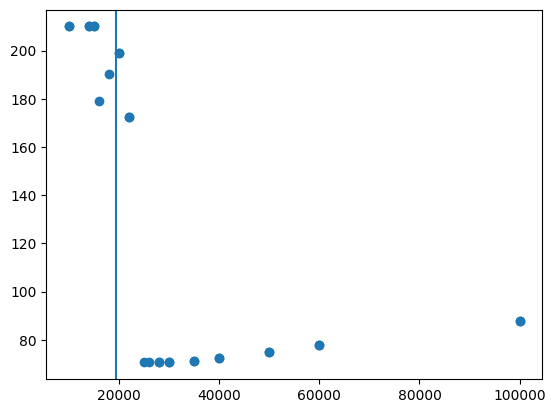

In [14]:
random_instrument = instruments_df.sample(1).iloc[0]["instrument_name"]
single_strike = instruments_df[
    (instruments_df["instrument_name"].str.startswith(random_instrument[0:11])) 
#     (instruments_df["instrument_name"].str.endswith(random_instrument[-1]))
]
single_strike_ids = single_strike.instrument_id.to_list()

options = pd.DataFrame(columns = single_option.columns.values)
for op_id in single_strike_ids:
    try:
        option = collect_single_instrument_data(instrument_id = op_id, number_of_ticks = 1)
        options = options.append(option)
    except:
        continue
    
plt.scatter(options["strike"], options["mark_iv"])
plt.axvline(x=option.iloc[0]["underlying_price"])
plt.show()

In [13]:
exp_date = options.iloc[0].instrument_name[:11]
print(f"Expirety date: {exp_date}")
options.to_pickle(f"data/{exp_date}.pkl")

Expirety date: BTC-31MAR23
